In [2]:
import cv2
import glob
from google.colab.patches import cv2_imshow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


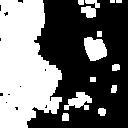

In [3]:
import numpy as np
file = '/content/drive/MyDrive/workspace/DBSCAN_02/63_unet_1024.png'
img = cv2.imread(file, 0)
#cv2_imshow(img)
img = cv2.resize(img, (0, 0), fx = 0.125, fy = 0.125)
ret, binImg = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
#img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# define the kernel
kernel = np.ones((5, 5), np.uint8)
# invert the image
#binImg = cv2.bitwise_not(img)
# dialate the image
img = cv2.dilate(binImg, kernel, iterations=1)
binImg = cv2.erode(img, kernel, iterations=1)
binImg = cv2.erode(img, kernel, iterations=1)
img = cv2.dilate(binImg, kernel, iterations=1)
#img = binImg
height = img.shape[0]
width = img.shape[1]
min = height if height < width else width
eps_spatial = min/4
cv2_imshow(img)

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

(16384, 1)
Cluster Labels:  [0 1]
Cluster Area:  [7130 9254]


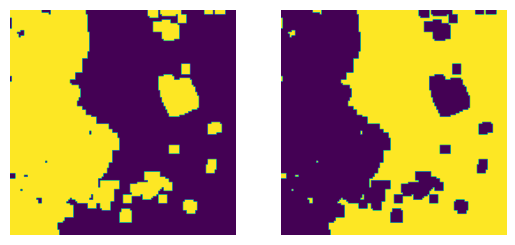

In [5]:
#hsvimg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
dbscan_img = img.copy()


#n = 0
#while(n<4):
#    labimg = cv2.pyrDown(hsvimg)
#    n = n+1

feature_image=np.reshape(dbscan_img, [-1, 1])
rows, cols = dbscan_img.shape
print(feature_image.shape)
db = DBSCAN(eps=5, min_samples=25,
            metric = 'euclidean',algorithm ='auto')
db.fit(feature_image)
labels = db.labels_
values, counts = np.unique(labels,
                           return_counts=True)
values = np.array(values)
counts = np.array(counts)
print("Cluster Labels: ", values)
print("Cluster Area: ", counts)

plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
labelImg = np.reshape(labels, [rows, cols])
plt.imshow(labelImg)
plt.axis('off')
plt.show()

Cluster Labels:  [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Cluster Area:  [  13 5907   11 9198  233   33    6   10  443   50   30   43  283    9
    7   55   53]


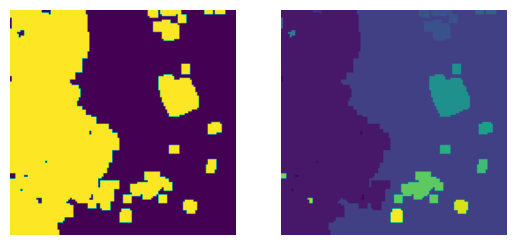

In [6]:
xycolors = []
for r in range(rows):
    for c in range(cols):
      if img[r, c] == 255:
        xycolors.append([r, c, 255])
      else:
        xycolors.append([r, c, 0])
#xycolors = [[0, 0], [0, 1], [1, 0], [1, 1], [99, 100], [100, 99], [100, 100]]
feature_image2 = np.reshape(xycolors, [-1, 3])
db = DBSCAN(eps=3, min_samples=5,
            metric = 'euclidean',algorithm ='auto')
db.fit(feature_image2)
labels2 = db.labels_
values, counts = np.unique(labels2,
                           return_counts=True)
values = np.array(values)
counts = np.array(counts)
print("Cluster Labels: ", values)
print("Cluster Area: ", counts)

plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
labelImg = np.reshape(labels2, [rows, cols])
plt.imshow(labelImg)
plt.axis('off')
plt.show()

In [7]:
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.measure import label, regionprops, regionprops_table

square = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]])
def multi_dil(im, num, element=square):
    for i in range(num):
        im = dilation(im, element)
    return im
def multi_ero(im, num, element=square):
    for i in range(num):
        im = erosion(im, element)
    return im
def refineCluster(thresholdImg):
  multi_dilated = multi_dil(thresholdImg, 3)
  #print("multi_dilated")
  #cv2_imshow(multi_dilated)
  multi_eroded = multi_ero(multi_dilated, 3)
  #print("multi_eroded")
  #cv2_imshow(multi_eroded)
  #area_closed = area_closing(multi_dilated, 50000)
  #print("area_closed")
  #cv2_imshow(area_closed)
  #opened = opening(multi_eroded)
  #print("opened")
  #cv2_imshow(opened)
  return multi_eroded

ClusterLabel =  -1
avg_val =  0 Cluster Area =  13
ClusterLabel =  0
avg_val =  255 Cluster Area =  5907
1 ] Object Area =  6021
Include Component Label =  1
ClusterLabel =  1
avg_val =  0 Cluster Area =  11
ClusterLabel =  2
avg_val =  0 Cluster Area =  9198
ClusterLabel =  3
avg_val =  255 Cluster Area =  233
1 ] Object Area =  287
Include Component Label =  1
ClusterLabel =  4
avg_val =  255 Cluster Area =  33
1 ] Object Area =  36
ClusterLabel =  5
avg_val =  0 Cluster Area =  6
ClusterLabel =  6
avg_val =  0 Cluster Area =  10
ClusterLabel =  7
avg_val =  255 Cluster Area =  443
1 ] Object Area =  465
Include Component Label =  1
ClusterLabel =  8
avg_val =  255 Cluster Area =  50
1 ] Object Area =  50
ClusterLabel =  9
avg_val =  255 Cluster Area =  30
1 ] Object Area =  30
ClusterLabel =  10
avg_val =  255 Cluster Area =  43
1 ] Object Area =  43
ClusterLabel =  11
avg_val =  255 Cluster Area =  283
1 ] Object Area =  320
Include Component Label =  1
ClusterLabel =  12
avg_val =

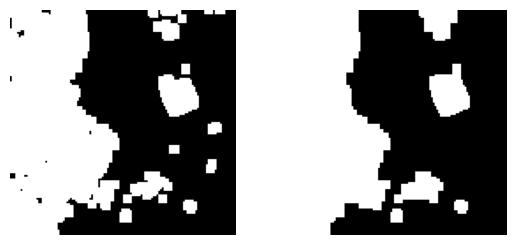

In [8]:
# Initialize a new image to store
# all the output components
outputImg = np.zeros(labelImg.shape,
                     dtype="uint8")
totalObjectArea = 0
totalObjectCnt = 0
bg_color = 0
cluster_index = 0
for clusterLabel in values:
 print("ClusterLabel = ", clusterLabel)
 #if clusterLabel < 0:
   #continue
 singleClusterImg = labelImg.copy()
 singleClusterImg[singleClusterImg == clusterLabel] = 255
 singleClusterImg[singleClusterImg != 255] = 0
 # Apply the Component analysis function
 thresholdImg = np.uint8(singleClusterImg)
 sum = 0
 for r in range(rows):
    for c in range(cols):
      if thresholdImg[r, c] == 255:
        sum = sum + img[r, c]
 avg_val = np.uint8(sum/counts[cluster_index])
 print("avg_val = ", avg_val, "Cluster Area = ", counts[cluster_index])
 cluster_index = cluster_index + 1

 if avg_val == bg_color:
  continue

 #cv2_imshow(thresholdImg)
 thresholdImg = refineCluster(thresholdImg)
 #cv2_imshow(thresholdImg)
 analysis = cv2.connectedComponentsWithStats(thresholdImg, 8)
 (totalLabels, label_ids, area_values, centroid) = analysis
  # Loop through each component
 for i in range(1, totalLabels):
    # Area of the component
    area = area_values[i, cv2.CC_STAT_AREA]
    print(i,"] Object Area = ", area)
    if (area > 50):
        print("Include Component Label = ", i)
        #componentMask = (label_ids == i).astype("uint8") * 255
        outputImg = cv2.bitwise_or(outputImg, thresholdImg)
        #cv2_imshow(outputImg)
        totalObjectArea += area
        totalObjectCnt+=1
 print("===================================================")
print("=====================================================")
print("=============FINAL OUTPUT============================")
print("=====================================================")

plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(outputImg, cmap = 'gray')
plt.axis('off')
print("Total Object Count: ", totalObjectCnt)
print("Total Object Area Coverage (Percentage): ",
      (totalObjectArea*100)/(height*width))


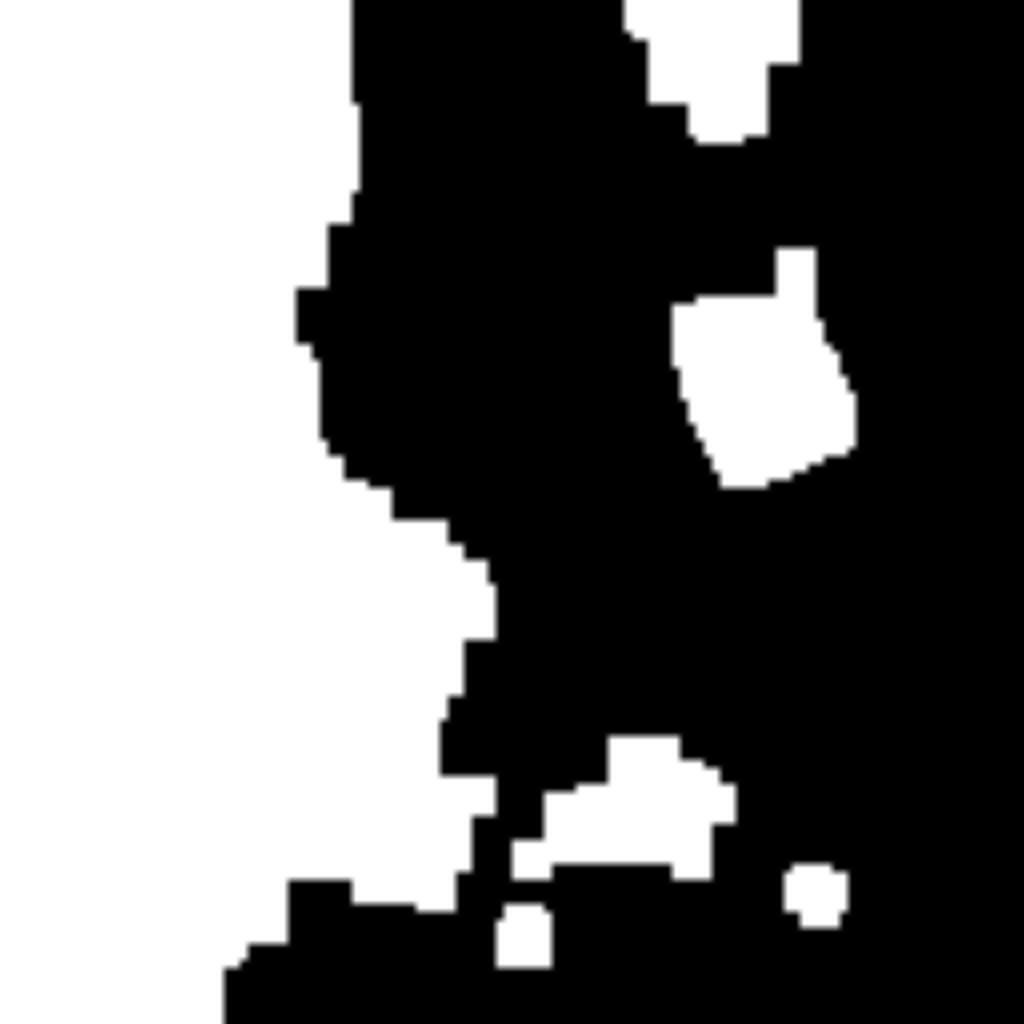

In [9]:
outputImg = cv2.resize(outputImg, (0, 0), fx = 8, fy = 8)
cv2_imshow(outputImg)